In [25]:
import numpy as np
import pandas as pd

In [64]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False


def convertToNumber(strVal):
    lowerStrVal = strVal.lower()
    print("original value", lowerStrVal)
    if lowerStrVal.endswith("k"):
        return int(float(strVal[0:len(strVal)-1]) * 1000)
    elif lowerStrVal.endswith("/month"):
        return int(float(strVal[0:len(strVal)-6]) * 12)
    elif lowerStrVal.endswith("/year"):
        return int(strVal[0:len(strVal)-5])
    elif isfloat(lowerStrVal):
        return int(float(lowerStrVal))
    else:
        return 0


In [62]:
WorldRecords = pd.read_csv(
    '/Users/qiqiangguan/projects/NEU/6105/Assignment/WorldRecords_1.csv', encoding="ISO-8859-1")
# print(WorldRecords.to_string())

In [66]:
dfTimeEvent = WorldRecords[(WorldRecords["Type"] == "time")]
# get top 5 items of this dateframe
dfTimeEvent = dfTimeEvent.head(5)
# print("dfTimeEvent", dfTimeEvent)

for index, row in dfTimeEvent.iterrows():
    record = row['Record']
    res = convertToNumber(str(record))
    print('converted value', res)
    print()


original value 100.6k
converted value 100600

original value 1003.35/month
converted value 12040

original value 102202/year
converted value 102202

original value 9.95
converted value 9

original value 993
converted value 993



               Event      Type       Record                    Athlete     Nationality                             Location  Year
0          Mens 100m      time        1006K                  Bob Hayes   United States                         Tokyo, Japan  1964
1          Mens 100m      time   1003/month                  Jim Hines   United States                      Sacramento, USA  1968
2          Mens 100m      time  102202/year             Charles Greene   United States                  Mexico City, Mexico  1968
3          Mens 100m      time         9.95                  Jim Hines   United States                  Mexico City, Mexico  1968
4          Mens 100m      time          993               Calvin Smith   United States                Colorado Springs, USA  1983
5          Mens 100m      time         9.92                 Carl Lewis   United States                   Seoul, South Korea  1988
6          Mens 100m      time          9.9              Leroy Burrell   United States    

In [27]:
#1.
UniqueEventNumbers = WorldRecords['Event'].nunique()
print("The number of different types of events is : ", UniqueEventNumbers)


The number of different types of events is :  10


In [28]:
#2.
UsainBolt = WorldRecords[WorldRecords["Athlete"] == "Usain Bolt"]

TheFirstYear = UsainBolt['Year'].min()
print("Usain Bolt first break the world record for the Men’s 100m is in : ", TheFirstYear,)


Usain Bolt first break the world record for the Men’s 100m is in :  2008


In [29]:
#3.Which variable tells us the record setting time or distance? The variable name in the data set is?
#What type of the variable is this?

VariableIndex = WorldRecords.columns[WorldRecords.isin(
    ['time'] and ['distance']).any()]

print('The variable name and type is:', VariableIndex)


The variable name and type is: Index(['Type'], dtype='object')


In [30]:
#4.Create a subset of the dataset that contains only the world record cases for men’s shotput and women’s shotput
#subset = WorldRecords[["Womens Shotput", "men’s shotput"]]

Shotput = WorldRecords[(WorldRecords["Event"] == "Womens Shotput") | (
    WorldRecords["Event"] == "Mens Shotput")]
print(Shotput)


              Event      Type  Record             Athlete Nationality  \
205    Mens Shotput  distance   17.68    Charlie Fonville         USA   
206    Mens Shotput  distance   17.79           Jim Fuchs         USA   
207    Mens Shotput  distance   17.82           Jim Fuchs         USA   
208    Mens Shotput  distance   17.90           Jim Fuchs         USA   
209    Mens Shotput  distance   17.95           Jim Fuchs         USA   
..              ...       ...     ...                 ...         ...   
280  Womens Shotput  distance   22.36     Ilona Slupianek         GDR   
281  Womens Shotput  distance   22.45     Ilona Slupianek         GDR   
282  Womens Shotput  distance   22.53  Natalya Lisovskaya         URS   
283  Womens Shotput  distance   22.60  Natalya Lisovskaya         URS   
284  Womens Shotput  distance   22.63  Natalya Lisovskaya         URS   

                  Location  Year  
205         Lawrence, U.S.  1948  
206           Oslo, Norway  1949  
207      Los Angel

Text(0, 0.5, 'Population')

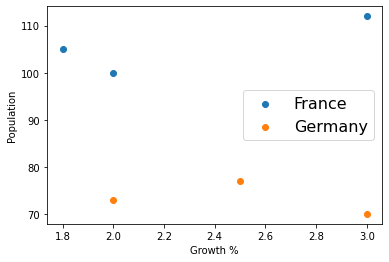

In [31]:

import matplotlib.pyplot as plt

dfGDPgrowth = pd.DataFrame({'France': [2, 1.8, 3], 'Germany': [
                           3, 2, 2.5]}, index=[2007, 2006, 2005])
dfpopulation = pd.DataFrame({'France': [100, 105, 112], 'Germany': [
                            70, 73, 77]}, index=[2007, 2006, 2005])

for col in dfGDPgrowth.columns:
    plt.scatter(dfGDPgrowth[col], dfpopulation[col], label=col)
plt.legend(loc='best', fontsize=16)
plt.xlabel('Growth %')
plt.ylabel('Population')


39
39


NameError: name 'WomenYearRange' is not defined

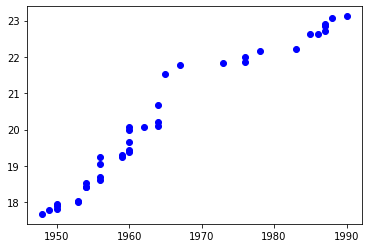

In [32]:
#5.Create a scatter plot of the year and record shotput distance one for men and one for women.
import matplotlib.pyplot as plt

#WomensShotput=Shotput['Womens Shotput'].tolist()
WomensShotputRange = WorldRecords[WorldRecords["Event"] == "Womens Shotput"]
#print(WomensShotputRange)

WomensRecordRange = WomensShotputRange['Record'].tolist()
#print(WomensRecordRange)
#print(len(WomensRecordRange))

WomensYearRange = WomensShotputRange['Year'].tolist()
#print(WomensYearRange)
#print(len(WomensYearRange))

#WomensShotputRange = WomensShotputRange.values.tolist()
#print(len(WomensShotputRange))

MensShotputRange = WorldRecords[WorldRecords["Event"] == "Mens Shotput"]
#print(MensShotputRange)

MensRecordRange = MensShotputRange['Record'].tolist()
#print(MensRecordRange)

print(len(MensRecordRange))
MensYearRange = MensShotputRange['Year'].tolist()
#print(MensYearRange)

print(len(MensYearRange))

#MensRecordRange =MensShotputRange.values.tolist()
#print(MensShotputRange)

#shotputYearRange=Shotput['Year'].values.tolist()
#print(len(shotputYearRange))

plt.scatter(MensYearRange, MensRecordRange, label='MensShotput', color='b')
plt.scatter(WomenYearRange, WomensRecordRange,
            label='WomensShotput', color='r')
plt.title('ShotputRecord')
plt.xlabel('Year')
plt.ylabel('distance')
plt.show()


In [ ]:
#6.Find the average/mean  time for each event. 
#How many athletes have time more than average in each event.

timeEvent = WorldRecords[(WorldRecords["Type"] == "time")]
#print(TimeEvent)

meantime = timeEvent.groupby('Event')['Record'].mean().reset_index(name='Time')

print(meantime)




         Event        Time
0    Mens 100m    9.848824
1    Mens 800m  105.345833
2    Mens Mile  237.493750
3  Womens 100m   10.880000
4  Womens 800m  127.851724
5  Womens Mile  263.653846


,Record,Year
Event,,
Mens 100m,9.848824,1991.117647
Mens 800m,105.345833,1964.500000
Mens Mile,237.493750,1956.875000
Womens 100m,10.880000,1978.900000
Womens 800m,127.851724,1954.310345
Womens Mile,263.653846,1979.307692


In [ ]:
#6.Find the average/mean time for each event.
#How many athletes have time more than average in each event.

dfTimeEvent = WorldRecords[(WorldRecords["Type"] == "time")]
dfTimeEvent = dfTimeEvent.head(5)
print(dfTimeEvent)
eventDict = {}
moreThanMeanDic = {}

for index, row in dfTimeEvent.iterrows():
    # print(index)  # 也可以不用
    #print(row)
    evt = row['Event']  # 取一列
    #print(evt)#所有活动名
    record = row['Record']
    #print(record)
    if evt in eventDict.keys():
        arr = eventDict[evt]
        arr[0] += record
        arr[1] += 1
    else:
        eventDict[evt] = [record, 1]
# print(eventDict)
for evt, value in eventDict.items():
    eventDict[evt].append(value[0]/value[1])
    # initiate moreThanMeanDic to 0.
    moreThanMeanDic[evt] = 0

print('eventDict', eventDict)

# for index, row in dfTimeEvent.iterrows():
#     evt = row['Event']
#     record = row['Record']
#     if record > eventDict[evt][2]:
#         if evt in moreThanMeanDic.keys():
#             moreThanMeanDic[evt] += 1
#         else:
#             moreThanMeanDic[evt] = 1

for index, row in dfTimeEvent.iterrows():
    evt = row['Event']
    record = row['Record']
    if record > eventDict[evt][2]:
        moreThanMeanDic[evt] += 1

print()
print('moreThanMeanDic', moreThanMeanDic)


       Event  Type  Record         Athlete    Nationality  \
0  Mens 100m  time   10.06       Bob Hayes  United States   
1  Mens 100m  time   10.03       Jim Hines  United States   
2  Mens 100m  time   10.02  Charles Greene  United States   
3  Mens 100m  time    9.95       Jim Hines  United States   
4  Mens 100m  time    9.93    Calvin Smith  United States   

                Location  Year  
0           Tokyo, Japan  1964  
1        Sacramento, USA  1968  
2    Mexico City, Mexico  1968  
3    Mexico City, Mexico  1968  
4  Colorado Springs, USA  1983  
eventDict {'Mens 100m': [49.99, 5, 9.998000000000001]}

moreThanMeanDic {'Mens 100m': 3}


In [ ]:
dfTimeEvent = WorldRecords[(WorldRecords["Type"] == "time")]
# get top 5 items of this dateframe
dfTimeEvent = dfTimeEvent.head(5)
print("dfTimeEvent", dfTimeEvent)

print("\n---------------------- loop from rows ----------------------")
for index, row in dfTimeEvent.iterrows():
    print("index", index)
    print(row)
    print()

print("\n---------------------- loop from column ----------------------")
for colName, colValue in dfTimeEvent.iteritems():
    print("colName", colName)
    print(colValue)
    print()

dfTimeEvent        Event  Type  Record         Athlete    Nationality  \
0  Mens 100m  time   10.06       Bob Hayes  United States   
1  Mens 100m  time   10.03       Jim Hines  United States   
2  Mens 100m  time   10.02  Charles Greene  United States   
3  Mens 100m  time    9.95       Jim Hines  United States   
4  Mens 100m  time    9.93    Calvin Smith  United States   

                Location  Year  
0           Tokyo, Japan  1964  
1        Sacramento, USA  1968  
2    Mexico City, Mexico  1968  
3    Mexico City, Mexico  1968  
4  Colorado Springs, USA  1983  

---------------------- loop from rows ----------------------
index 0
Event              Mens 100m
Type                    time
Record                 10.06
Athlete            Bob Hayes
Nationality    United States
Location        Tokyo, Japan
Year                    1964
Name: 0, dtype: object

index 1
Event                Mens 100m
Type                      time
Record                   10.03
Athlete              Jim 

In [ ]:
a=[17.68, 17.79, 17.82, 17.9]
b= a[0:2]
print(b)

[17.68, 17.79]


SyntaxError: unexpected EOF while parsing (<ipython-input-179-475c70299329>, line 1)

In [ ]:
shotputYearRange=Shotput['Year'].tolist()
mensShotput = WorldRecords[WorldRecords["Event"] == "Mens Shotput"]
mensShotputRange = mensShotput[['Year','Record']]
womensShotput = WorldRecords[WorldRecords["Event"] == "Womens Shotput"]
womensShotputRange =womensShotput[['Year','Record']]
print(womensShotputRange)
print(mensShotputRange)

     Year  Record
244  1948   14.59
245  1949   14.86
246  1950   15.02
247  1952   15.28
248  1952   15.37
249  1952   15.42
250  1953   16.20
251  1954   16.28
252  1955   16.28
253  1955   16.67
254  1956   16.76
255  1959   17.25
256  1960   17.42
257  1960   17.78
258  1962   18.55
259  1962   18.55
260  1965   18.59
261  1968   18.67
262  1968   18.87
263  1968   19.07
264  1968   19.61
265  1969   19.72
266  1969   20.09
267  1969   20.10
268  1969   20.10
269  1969   20.43
270  1971   20.43
271  1972   20.63
272  1972   21.03
273  1973   21.20
274  1975   21.60
275  1976   21.67
276  1976   21.87
277  1976   21.89
278  1976   21.99
279  1977   22.32
280  1980   22.36
281  1980   22.45
282  1984   22.53
283  1987   22.60
284  1987   22.63
     Year  Record
205  1948   17.68
206  1949   17.79
207  1950   17.82
208  1950   17.90
209  1950   17.95
210  1953   18.00
211  1953   18.04
212  1954   18.42
213  1954   18.43
214  1954   18.54
215  1956   18.62
216  1956   18.69
217  1956 

In [ ]:
WomensShotput = WorldRecords[WorldRecords["Event"] == "Womens Shotput"]
MensShotput = WorldRecords[WorldRecords["Year"]==(WorldRecords["Event"] == "Mens Shotput")]
print(WomensShotput)
# type(WorldRecords)

              Event      Type  Record             Athlete Nationality  \
244  Womens Shotput  distance   14.59  Tatyana Sevryukova         URS   
245  Womens Shotput  distance   14.86   Klavdia Tochonova         URS   
246  Womens Shotput  distance   15.02       Anna Andreeva         URS   
247  Womens Shotput  distance   15.28       Galina Zybina         URS   
248  Womens Shotput  distance   15.37       Galina Zybina         URS   
249  Womens Shotput  distance   15.42       Galina Zybina         URS   
250  Womens Shotput  distance   16.20       Galina Zybina         URS   
251  Womens Shotput  distance   16.28       Galina Zybina         URS   
252  Womens Shotput  distance   16.28       Galina Zybina         URS   
253  Womens Shotput  distance   16.67       Galina Zybina         URS   
254  Womens Shotput  distance   16.76       Galina Zybina         URS   
255  Womens Shotput  distance   17.25        Tamara Press         URS   
256  Womens Shotput  distance   17.42        Tamara

<AxesSubplot:xlabel='Year', ylabel='Record'>

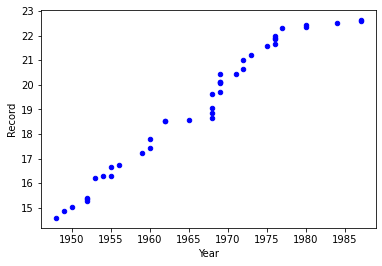

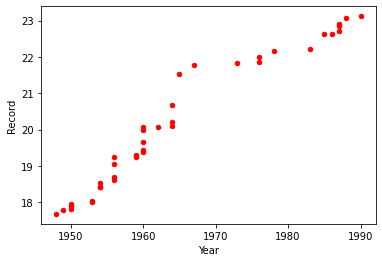

In [ ]:

WomensShotput.plot(kind = 'scatter',x = 'Year', y = 'Record',color='blue')
MensShotput.plot(kind = 'scatter',x = 'Year', y = 'Record',color= 'red')


In [ ]:
dfTimeEvent = WorldRecords[(WorldRecords["Type"] == "time")]
eventDict = {}
moreThanMeanDic = {}
for index, row indfTimeEvent.iterrows():
    evt = row
